<a href="https://colab.research.google.com/github/AmandeepSingh285/Lung-Disease-Detection/blob/master/inception_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width = "80%">
  <thead>
    <th>Charecteristic</th>
    <th>Value</th>
  </thead>
  <tr>
    <td> Dataset </td>
    <td> Pneumonia </td>
  </tr>
  <tr>
    <td> Architecture </td>
    <td> InceptionNet </td>
  </tr>
  <tr>
    <td> Training </td>
    <td> Pre Trained </td>
  </tr>
</table>

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import shutil
import glob
import cv2
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.applications.inception_v3 import InceptionV3

labels = ["NORMAL", "PNEUMONIA"]

%load_ext tensorboard

checkpoint_path = "/content/drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/weights/pneumonia_inception.h5"



%load_ext tensorboard


print("Libraries imported")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Libraries imported


In [ ]:
base_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [ ]:
base_model.trainable = False

In [ ]:
driveValImages    = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/val')
driveTestImages   = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/test')
driveTrainImages  = os.path.join(os.getcwd(), 'drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/train')

In [ ]:
train_datagen = ImageDataGenerator(
                   rescale=1/255.0,
                   rotation_range=20, 
                   zoom_range=0.15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   horizontal_flip=True,
                   vertical_flip=False,
                   )

val_datagen = ImageDataGenerator(
    rescale = 1/255.0
)

train_generator = train_datagen.flow_from_directory(
                                   driveTrainImages,
                                   target_size=(224, 224),
                                   color_mode='rgb',
                                   batch_size= 32,
                                   class_mode='binary',
                                   shuffle = True
                                   )
val_generator = val_datagen.flow_from_directory(
                                driveValImages,
                                target_size=(224, 224),
                                batch_size= 32,
                                color_mode='rgb',
                                class_mode='binary',
                                shuffle = True
                                )

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                                driveTestImages,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=False,
                                class_mode='binary',
                                color_mode = 'rgb'
                                )

print("DONE")

Found 4232 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
DONE


In [ ]:
nclass = len(train_generator.class_indices)

In [ ]:
add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = add_model
model.summary()
metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
optimizer = Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'], metrics = metrics)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
checkpointOne = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.3,
    min_lr = 3e-7
)
checkpoint_saver = ModelCheckpoint('pneumonia_inception.h5', save_best_only=True)
checkPointTwo = EarlyStopping(monitor='acc', patience=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%d%m%Y-%H%M")
checkPointThree = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks_list = [checkpointOne, checkpoint_saver, checkPointTwo, checkPointThree]

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks = callbacks_list)

Epoch 1/10
133/133 [==============================] - 92s 624ms/step - loss: 0.5579 - accuracy: 0.7550 - precision: 0.8136 - recall: 0.8995 - val_loss: 0.7371 - val_accuracy: 0.5270 - val_precision: 0.5139 - val_recall: 0.9980 - lr: 1.0000e-04
Epoch 2/10
133/133 [==============================] - 80s 601ms/step - loss: 0.4450 - accuracy: 0.8027 - precision: 0.8323 - recall: 0.9432 - val_loss: 0.5566 - val_accuracy: 0.6610 - val_precision: 0.5973 - val_recall: 0.9880 - lr: 1.0000e-04
Epoch 3/10
133/133 [==============================] - 80s 601ms/step - loss: 0.3798 - accuracy: 0.8322 - precision: 0.8584 - recall: 0.9462 - val_loss: 0.4969 - val_accuracy: 0.7330 - val_precision: 0.6547 - val_recall: 0.9860 - lr: 1.0000e-04
Epoch 4/10
133/133 [==============================] - 80s 598ms/step - loss: 0.3546 - accuracy: 0.8436 - precision: 0.8706 - recall: 0.9447 - val_loss: 0.4716 - val_accuracy: 0.7490 - val_precision: 0.6689 - val_recall: 0.9860 - lr: 1.0000e-04
Epoch 5/10
133/133 [====

In [ ]:
! mv '/content/pneumonia_inception.h5' '/content/drive/MyDrive/Google_Colab/Lung_disease_detection/working_dataset/weights/pneumonia_inception.h5'

In [ ]:
model.load_weights(checkpoint_path)
print("model loaded")

model loaded


In [ ]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
metrics = model.evaluate(test_generator, return_dict = True)
for metric in metrics:
  print(f"{metric} : {metrics[metric]}")

20/20 [==============================] - 121s 6s/step - loss: 0.5123 - accuracy: 0.7420 - precision: 0.7215 - recall: 0.9564
loss : 0.5122678875923157
accuracy : 0.7419871687889099
precision : 0.7214699983596802
recall : 0.9564102292060852


In [ ]:
predictions = model.predict(test_generator)
predictions = np.round(abs(predictions))
classes = test_generator.labels
print(predictions)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.

In [ ]:
classification_report(classes, predictions, target_names = labels)

'              precision    recall  f1-score   support\n\n      NORMAL       0.84      0.38      0.53       234\n   PNEUMONIA       0.72      0.96      0.82       390\n\n    accuracy                           0.74       624\n   macro avg       0.78      0.67      0.68       624\nweighted avg       0.77      0.74      0.71       624\n'

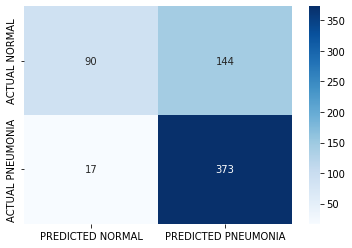

In [ ]:
xlabels = ["PREDICTED NORMAL", "PREDICTED PNEUMONIA"]
ylabels = ["ACTUAL NORMAL", "ACTUAL PNEUMONIA"]

matrix = confusion_matrix(classes, predictions)
sns.heatmap(matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = xlabels, yticklabels = ylabels)